In [28]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 

In [29]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_42/interim_samples_42_plus.npz"

In [30]:
ds = load_dataset(fpath)

In [31]:
ds.keys()

dict_keys(['samples', 'truth', 'hyper'])

In [32]:
ds['samples'].keys()

dict_keys(['e1', 'e2'])

In [33]:
ds['samples']['e1'].shape

(10, 300)

np.float64(-0.06405507390827797)

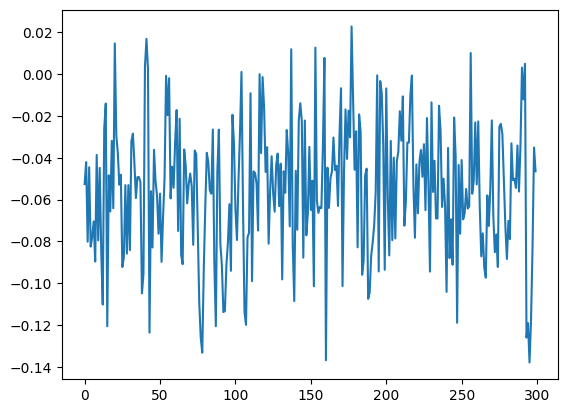

In [41]:
plt.plot(ds['samples']['e1'][2, :])
ds['truth']['e1'][2]

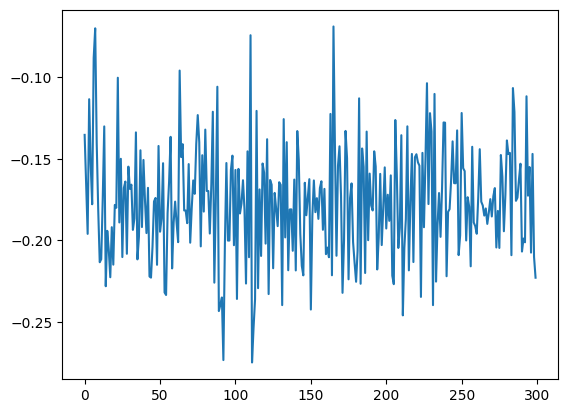

In [37]:
plt.plot(ds['samples']['e2'][5, :])

In [38]:
ds['truth']['e2'][5]

np.float64(-0.16704706227716148)

In [25]:
ds['truth']['lf']

array([2.86486785, 2.662339  , 2.7611502 , 2.86863357, 3.37153474,
       2.75626222, 2.94379159, 2.47108844, 2.52431915, 2.59457771])